<a href="https://colab.research.google.com/github/Ladangigo/WORDLE_Entendimiento_datos/blob/main/Estadisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy import stats
import random
import os
sns.set_style("whitegrid")

Se realizan muestreos de cada fuente de información

In [ ]:
with open('/content/Data/final_cleanLauraV4.txt', 'r',encoding="utf8") as raw_file:
    archivo = raw_file.read()

In [ ]:
final_resume_file = archivo.split(' ')

In [ ]:
Muestra = int(len(final_resume_file)/10)
MuestreoDatosLimpios = random.sample(final_resume_file, Muestra)
print(MuestreoDatosLimpios)
print(Muestra)

['cooperacion', 'hominina', 'hacernos', 'paisanos', 'visconti', 'claro', 'panathinaiko', 'renunciar', 'mosaicos', 'descolonizados', 'urus', 'juglaria', 'champions', 'zaire', 'legalmente', 'semidivino', 'cazar', 'talan', 'estratificacion', 'hongos', 'demografia', 'liquidos', 'proveedores', 'jefatura', 'instalaron', 'saulo', 'dedicarse', 'estigmatiza', 'judesco', 'monteleone', 'continuamente', 'intercultural', 'desquite', 'gual', 'dejara', 'metodos', 'aligeran', 'precio', 'reemplazarse', 'vacunaciones', 'eolia', 'fronterizas', 'reembolsados', 'sextante', 'australia', 'estadisticamente', 'latifundios', 'esferica', 'sonora', 'signatarios', 'retribuye', 'vichy', 'maestrias', 'irrumpieron', 'aufhebung', 'procesual', 'revoluciono', 'septiembre', 'relanzo', 'hablo', 'transacciones', 'llueve', 'edades', 'panopoulos', 'palomas', 'comerciante', 'campillo', 'reconoce', 'puccini', 'suboficiales', 'abogo', 'deseen', 'tirania', 'celebracion', 'reconducir', 'waldorf', 'formado', 'creciendo', 'donnell'

Se realiza recopilación de datos con su respectiva gráfica 

In [ ]:
Total_palabras = len(final_resume_file)
print (f"Se cuenta con un total de {Total_palabras} palabras")

Se cuenta con un total de 32430 palabras


In [ ]:
#Longitud de las palabras
longitud_palabras = []
for palabra in final_resume_file:
  longitud = len(palabra)
  longitud_palabras.append(longitud)

dicLongitud = {'Longitud':longitud_palabras}
DFLongitud = pd.DataFrame(dicLongitud)
print (f"El banco de palabras cuenta con una longitud de palabras : {longitud_palabras[:10]}")


El banco de palabras cuenta con una longitud de palabras : [10, 9, 8, 5, 10, 5, 8, 9, 8, 10]


In [ ]:
# medidas de tendencia central para la longitud de todas las palabras
media = np.mean(longitud_palabras)
mediana = np.median(longitud_palabras)
moda = stats.mode(longitud_palabras)

print(f"la media es {media}, la mediana es {mediana}, la moda es {moda}")

la media es 8.502528522972556, la mediana es 8.0, la moda es ModeResult(mode=array([8]), count=array([4873]))


In [ ]:
#Medidas de dispersión estadística
desviacionEstandar = np.std(longitud_palabras)
varianza = np.var(longitud_palabras)
rango = max(longitud_palabras) - min(longitud_palabras)

#define la función para calcular cv 
cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100 
 
#calcular CV
cova= cv(longitud_palabras)
print(f"El rango es {rango}, la varianza es de {varianza} y la desviación estandar de {desviacionEstandar}")
print(cova)

import scipy
from scipy.stats import variation

var = scipy.stats.variation(longitud_palabras, axis = None)
print(var)

El rango es 21, la varianza es de 6.7819085001885995 y la desviación estandar de 2.604209765012911
30.629122973835727
0.30628650735798496


In [ ]:
#Medidas de posicionamiento estadístico:
c1 = np.percentile(longitud_palabras,25)
c2 = np.percentile(longitud_palabras,50)    
c3 = np.percentile(longitud_palabras,75)
per90 = np.percentile(longitud_palabras,90)

dicMP = {'Q1': c1,'Q2': c2, 'Q3':c3, 'P90': per90}
print(dicMP)

RIC = c3 -c1
datos_atipicos = c3 + 1.5*RIC
print(datos_atipicos)
print (f"El rango intercualil es {RIC} y se tienen datos atípicos para valores mayores a {datos_atipicos}")

{'Q1': 7.0, 'Q2': 8.0, 'Q3': 10.0, 'P90': 12.0}
14.5
El rango intercualil es 3.0 y se tienen datos atípicos para valores mayores a 14.5


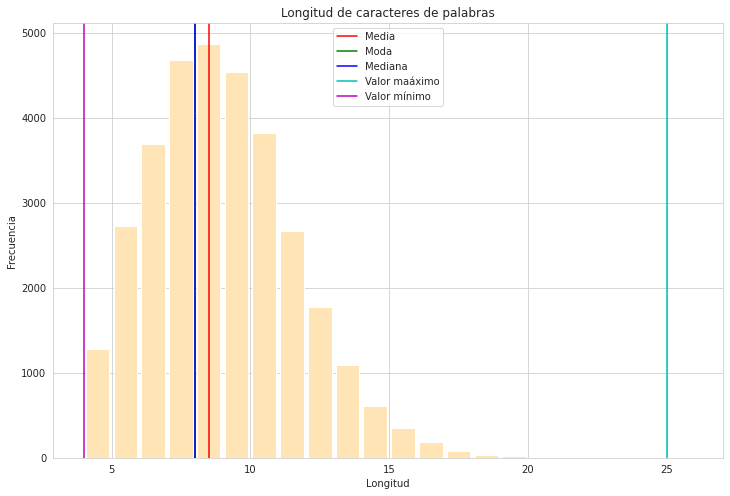

range(4, 27)


In [ ]:
mayor = max(longitud_palabras)
menor = min(longitud_palabras)

plt.figure(figsize = (12,8))
plt.axvline(media, label = 'Media', color='r')
plt.axvline(moda[0],label = 'Moda', color='g')
plt.axvline(mediana,label = 'Mediana', color='b')
plt.axvline(mayor,label = 'Valor maáximo', color='c')
plt.axvline(menor,label = 'Valor mínimo', color='m')

plt.title('Longitud de caracteres de palabras')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.legend()
intervalos = range(min(longitud_palabras), max(longitud_palabras) + 2) #calculamos los extremos de los intervalos
plt.hist(longitud_palabras, bins=intervalos, color='moccasin', rwidth=0.85)
plt.grid(True)
plt.show()

print(intervalos)


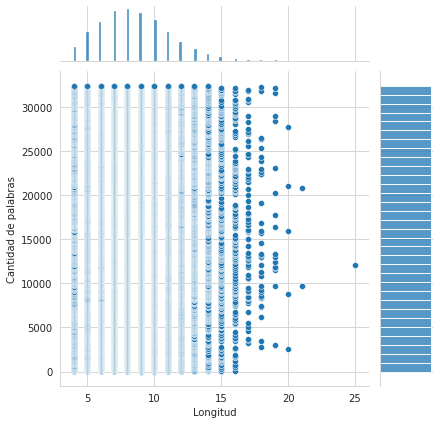

In [ ]:
DicLongitudPalabras = {'Longitud':longitud_palabras, 'Cantidad de palabras': [ ]}
cont = 0
for i in longitud_palabras:
  cont = cont + 1
  DicLongitudPalabras['Cantidad de palabras'].append(cont)


DFLongitudPalabras = pd.DataFrame(DicLongitudPalabras)


sns.jointplot(x = "Longitud", y = "Cantidad de palabras", data = DFLongitudPalabras)


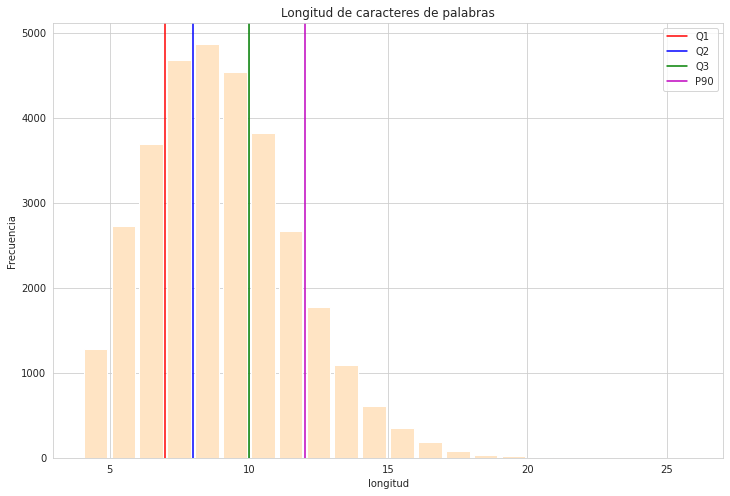

In [ ]:
plt.figure(figsize = (12,8))
plt.axvline(c1, label = 'Q1', color='r')
plt.axvline(c2,label = 'Q2', color='b')
plt.axvline(c3,label = 'Q3', color='g')
plt.axvline(per90,label = 'P90', color='m')
plt.title('Longitud de caracteres de palabras')
plt.xlabel('longitud')
plt.ylabel('Frecuencia')
plt.legend()
intervalos = range(min(longitud_palabras), max(longitud_palabras) + 2) #calculamos los extremos de los intervalos
plt.hist(longitud_palabras, bins=intervalos, color='bisque', rwidth=0.85)
plt.grid(True)
plt.show()

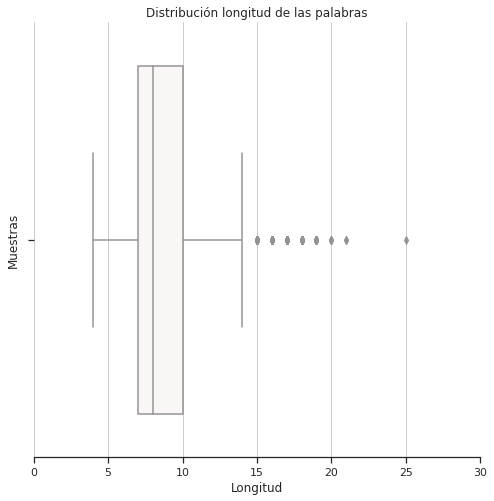

In [ ]:
#Graficar un boxplot
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(8, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Longitud", data=DFLongitud.sort_values('Longitud'),palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Muestras")
ax.set_title('Distribución longitud de las palabras')
ax.axis(xmin=0,xmax=30)
sns.set_theme(style="whitegrid")
sns.despine(trim=True, left=True)

In [ ]:
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z']
dictotal={}
for i in letters:
  dictotal[i]=archivo.count(i)
DFAlfabeto = pd.DataFrame(dictotal,index=[0])
print(DFAlfabeto)

       a     b      c      d      e     f     g     h      i     j  ...    q  \
0  35862  4648  14735  11743  27468  3072  4414  2437  26036  1082  ...  619   

       r      s      t     u     v    w    x    y     z  
0  21340  19517  14964  7964  3385  369  725  816  1642  

[1 rows x 27 columns]


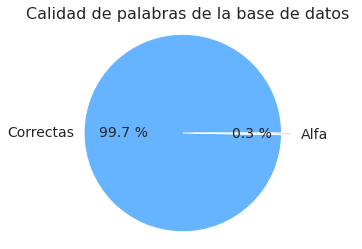

In [ ]:
#Conocer cuantas palabras buenas hay 
sns.set_theme(style="ticks")
Banco_Palabras = [32435,85]
nombres = ["Correctas","Alfa"]
desfase = (0, 0.1)
plt.pie(Banco_Palabras, labels=nombres,autopct="%0.1f %%",explode=desfase, textprops={'fontsize': 14},
        colors=['#66b3ff', '#ff9999'])
plt.axis("equal")
plt.title('Calidad de palabras de la base de datos', fontsize=16)
plt.show()

In [ ]:
Patrones_l4={'Patrones':['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110'],'Cantidad':[6,1,58,28,201,586,117,9,7,79,113,30,2,14,2]}
pdPatrones_l4=pd.DataFrame(Patrones_l4)
pdPatrones_l4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


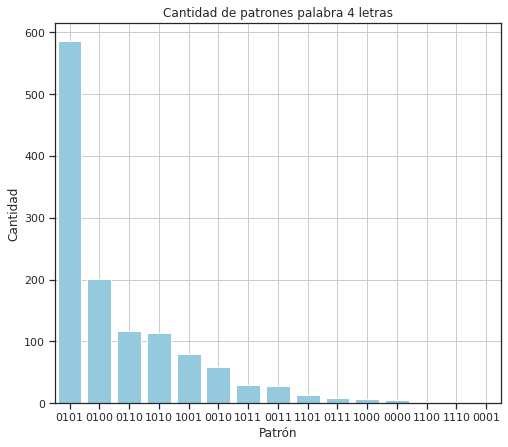

In [ ]:
ax = sns.barplot(pdPatrones_l4['Patrones'],pdPatrones_l4['Cantidad'], order=pdPatrones_l4.sort_values('Cantidad',ascending = False).Patrones,color='skyblue')
ax.set_title('Cantidad de patrones palabra 4 letras')
plt.xlabel('Patrón')
plt.grid(True)

In [ ]:
Estructura_banco = {'Longitud':[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25],'Frecuencia':[1284,2726,3687,4686,4873,4535,3821,2668,1769,1096,613,353,184,76,35,16,5,2,1],'Cantidad de patrones':[14,27,47,80,121,180,226,268,315,322,277,204,139,69,31,15,4,2,1]}
pdEstructura_banco=pd.DataFrame(Estructura_banco)
pdEstructura_banco

,Longitud,Frecuencia,Cantidad de patrones
0,4,1284,14
1,5,2726,27
2,6,3687,47
3,7,4686,80
4,8,4873,121
5,9,4535,180
6,10,3821,226
7,11,2668,268
8,12,1769,315
9,13,1096,322


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


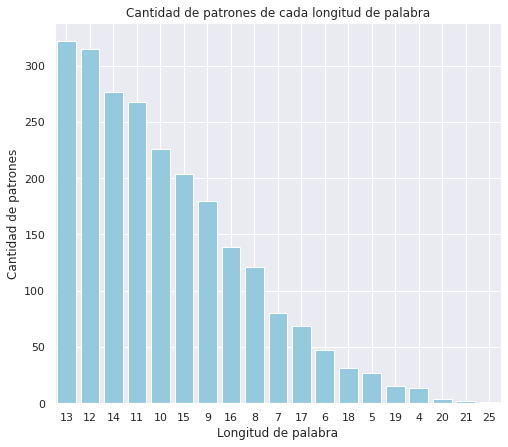

In [ ]:
ax = sns.barplot(pdEstructura_banco['Longitud'],pdEstructura_banco['Cantidad de patrones'], order=pdEstructura_banco.sort_values('Cantidad de patrones',ascending = False).Longitud,color='skyblue')

ax.set_title('Cantidad de patrones de cada longitud de palabra')
plt.xlabel('Longitud de palabra')
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


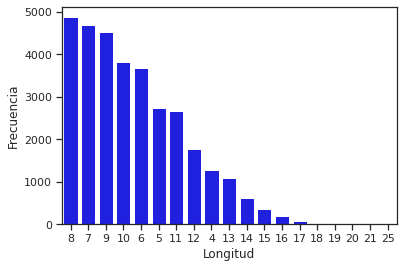

In [ ]:
ax = sns.barplot(pdEstructura_banco['Longitud'],pdEstructura_banco['Frecuencia'], order=pdEstructura_banco.sort_values('Frecuencia',ascending = False).Longitud,color="blue")

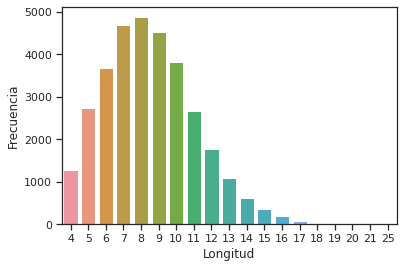

In [ ]:
s = sns.barplot(x =pdEstructura_banco['Longitud'],y=pdEstructura_banco['Frecuencia'] , data = pdEstructura_banco)

[Text(0.5, 0, 'Posición')]

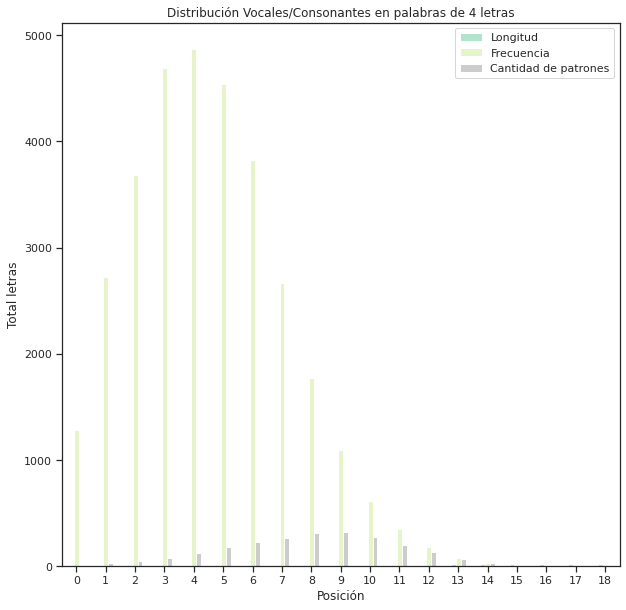

In [ ]:
sns.set_theme(style="ticks")
barplot = pdEstructura_banco.plot.bar(rot=0, colormap='Pastel2', figsize=(10,10))
barplot.set_title('Distribución Vocales/Consonantes en palabras de 4 letras')
barplot.set(ylabel="Total letras")
barplot.set(xlabel="Posición")


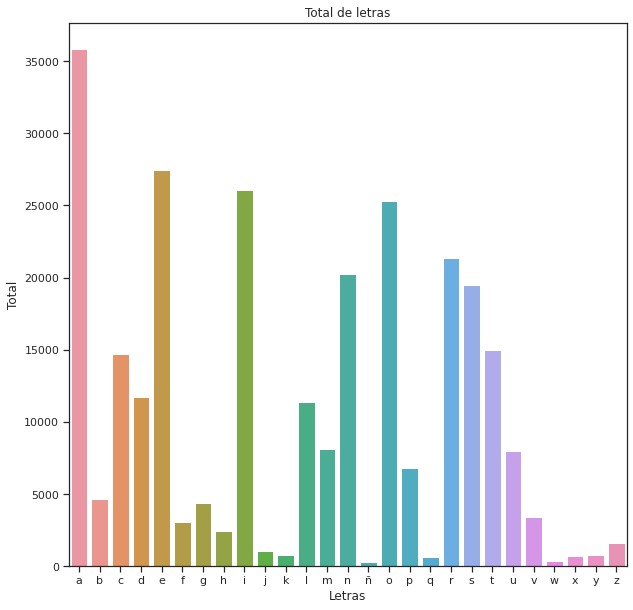

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Total de letras')
ax.set(ylabel="Total")
ax.set(xlabel="Letras")
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=DFAlfabeto)

In [ ]:
alphabet = {}
alphabet2 = {}
for letter in letters:
  alphabet[letter] = []


for word in final_resume_file:
  for position,letter in enumerate(word):
      alphabet[letter].append(position) 



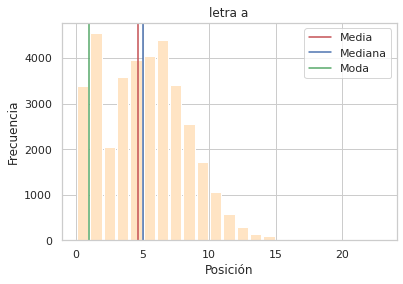

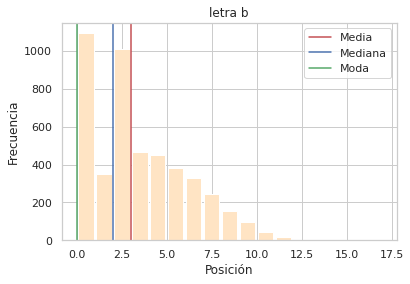

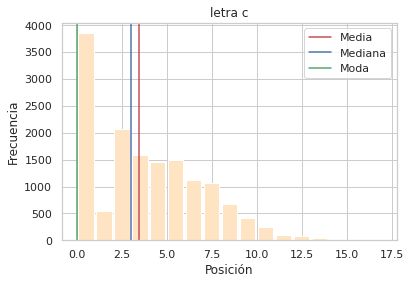

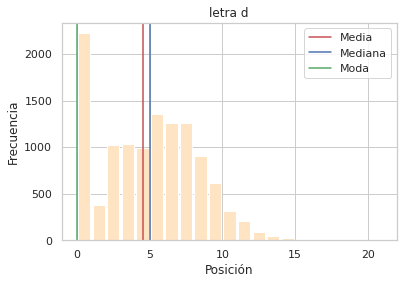

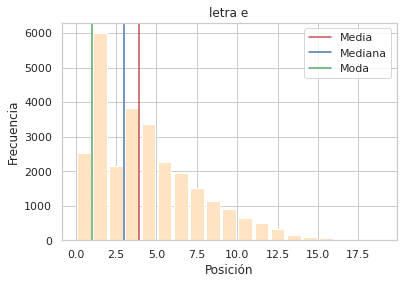

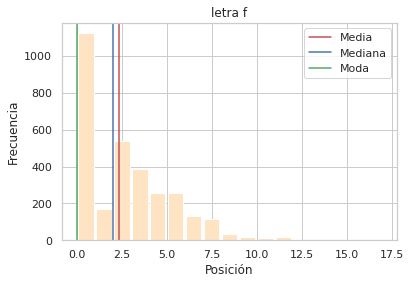

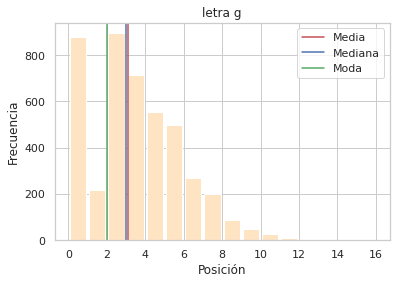

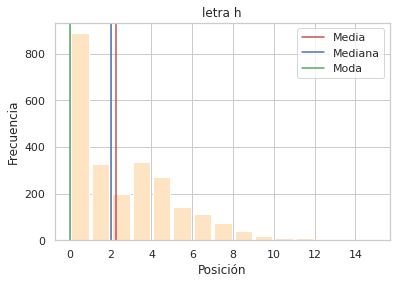

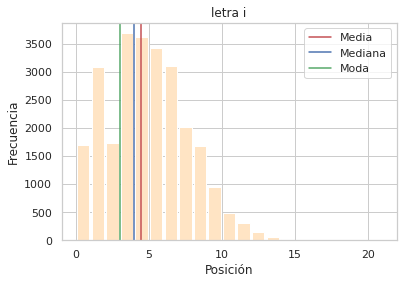

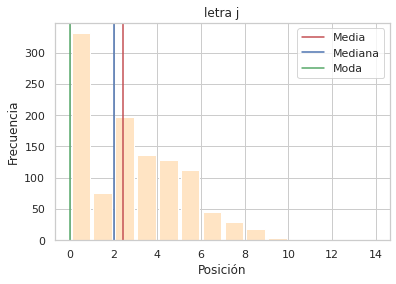

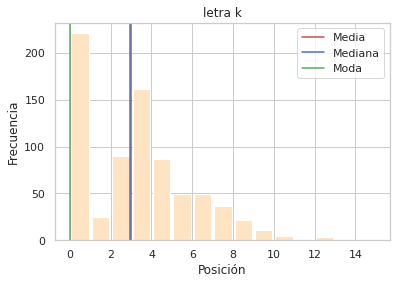

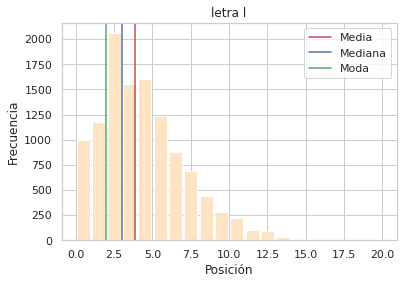

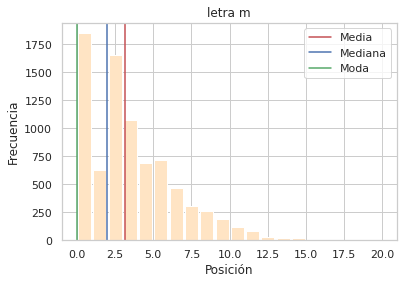

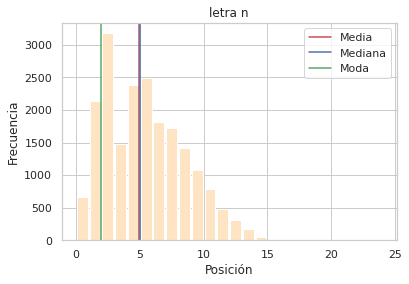

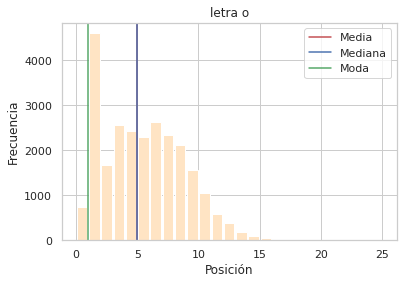

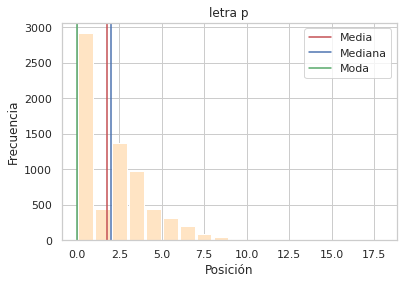

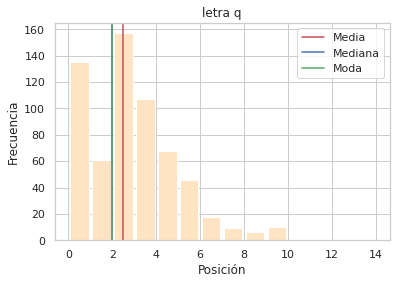

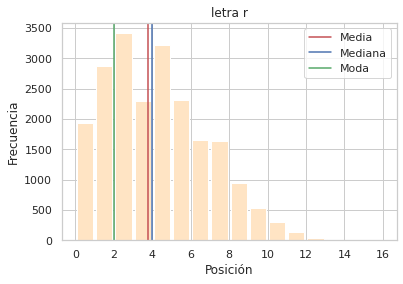

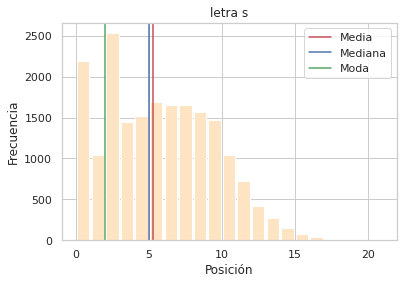

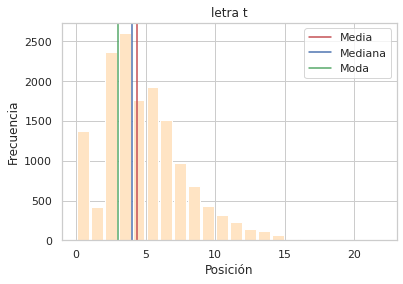

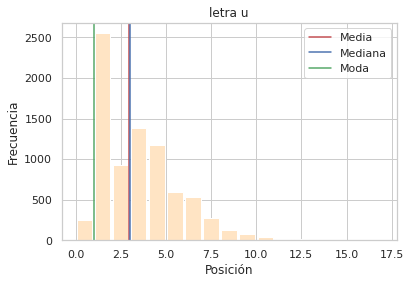

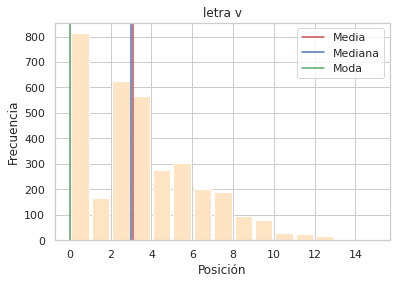

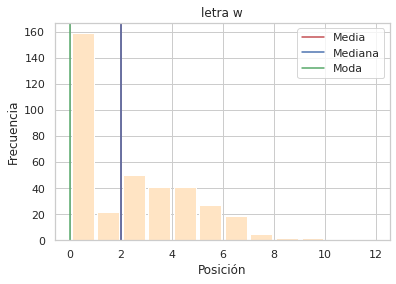

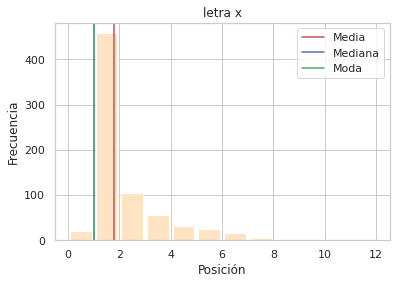

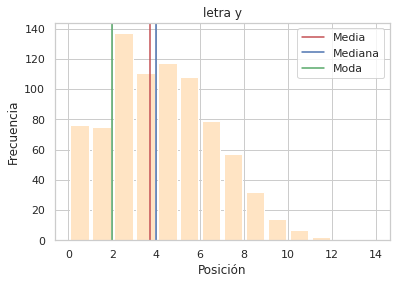

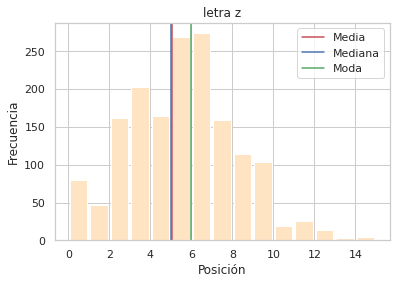

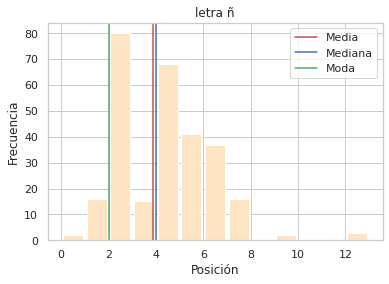

In [ ]:
posicion = 1
myList = alphabet.items()
myList = sorted(myList) 
x, y = zip(*myList) 
DicMedidasTendenciaCEntral = {'Letra':[ ],'Mediana': [ ], 'Media': [ ],'Moda': [ ] }
DicDistribucionPosicion = {'Letra':[ ],'Q1': [ ], 'Q2': [ ],'Q3': [ ], 'RIC': [ ], 'Valores atípicos': [ ] }
DicMedidasdedispersión = {'Letra':[ ],'rango': [ ], 'varianza': [ ],'des. estandar': [ ] }


for letra in myList:  
    cuartilA1 = np.percentile(letra[1],25)
    cuartilA2 = np.percentile(letra[1],50)    
    cuartilA3 = np.percentile(letra[1],75)
    RIC = cuartilA3 - cuartilA1
    vAtipicos = cuartilA3 + 1.5*RIC

    DicDistribucionPosicion['Letra'].append(letra[0])
    DicDistribucionPosicion['Q1'].append(cuartilA1)
    DicDistribucionPosicion['Q2'].append(cuartilA2)
    DicDistribucionPosicion['Q3'].append(cuartilA3)
    DicDistribucionPosicion['RIC'].append(RIC)
    DicDistribucionPosicion['Valores atípicos'].append(vAtipicos)

    media = np.mean(letra[1])
    mediana = np.median(letra[1])
    moda = stats.mode(letra[1])
    DicMedidasTendenciaCEntral['Letra'].append(letra[0])
    DicMedidasTendenciaCEntral['Media'].append(media)
    DicMedidasTendenciaCEntral['Mediana'].append(mediana)
    DicMedidasTendenciaCEntral['Moda'].append(moda)
   
    desviacionEstandar = np.std(letra[1])
    varianza = np.var(letra[1])
    rango = max(letra[1]) - min (letra[1])
    DicMedidasdedispersión['Letra'].append(letra[0])
    DicMedidasdedispersión['rango'].append(rango)
    DicMedidasdedispersión['varianza'].append(varianza)
    DicMedidasdedispersión['des. estandar'].append(desviacionEstandar)
    
    #plt.axvline(cuartilA1, color='r')
   # plt.axvline(cuartilA2, color='b')
   # plt.axvline(cuartilA3, color='g')

    plt.axvline(media, label = 'Media', color='r')
    plt.axvline(mediana, label = 'Mediana', color='b')
    plt.axvline(moda[0],label = 'Moda' ,color='g')

    plt.title(f"letra {letra[0]}")
    plt.xlabel('Posición')
    plt.ylabel('Frecuencia')
    plt.legend()
    intervalosA = range(min(letra[1]), max(letra[1]) + 2) #calculamos los extremos de los intervalos
    plt.hist(letra[1], bins=intervalosA, color='bisque', rwidth=0.85)
    plt.grid(True)
    plt.show()
    posicion = posicion +1

In [ ]:
DFMedidasTendenciaCEntral= pd.DataFrame(DicMedidasTendenciaCEntral)
#DFMedidasTendenciaCEntral

DFDistribucionPosicion = pd.DataFrame(DicDistribucionPosicion)
DFDistribucionPosicion

DFMedidasdedispersión = pd.DataFrame(DicMedidasdedispersión)
DFMedidasdedispersión

,Letra,rango,varianza,des. estandar
0,a,22,9.532278,3.087439
1,b,16,7.036785,2.652694
2,c,16,9.007525,3.001254
3,d,20,10.569842,3.251129
4,e,18,10.073075,3.173811
5,f,16,5.868334,2.422465
6,g,15,5.649473,2.376862
7,h,14,5.953853,2.440052
8,i,20,7.602861,2.757329
9,j,13,5.023941,2.241415


In [ ]:
DFDistribucionPosicion

,Letra,Q1,Q2,Q3,RIC,Valores atípicos
0,a,2.0,5.0,7.0,5.0,14.5
1,b,1.0,2.0,5.0,4.0,11.0
2,c,0.0,3.0,6.0,6.0,15.0
3,d,2.0,5.0,7.0,5.0,14.5
4,e,1.0,3.0,6.0,5.0,13.5
5,f,0.0,2.0,4.0,4.0,10.0
6,g,2.0,3.0,5.0,3.0,9.5
7,h,0.0,2.0,4.0,4.0,10.0
8,i,3.0,4.0,6.0,3.0,10.5
9,j,0.0,2.0,4.0,4.0,10.0


In [ ]:
dictOFdicts = {}
dictToDF_letterPosition = {'Letra':[], 'Posicion':[]}
dictToDF_wordInfo = {'Consonante':[], 'Vocal':[], 'Longitud': []}

#Conocer el numero de vocales y consonantes de una palabra
for word in final_resume_file:
  numberVowels = len([l for l in word if l in 'aeiou'])
  numberCons = len(word) - numberVowels
  length = len(word)
  dictToDF_wordInfo['Consonante'].append(numberCons)
  dictToDF_wordInfo['Vocal'].append(numberVowels)
  dictToDF_wordInfo['Longitud'].append(length)

  for position,letter in enumerate(word):    
    dictToDF_letterPosition['Letra'].append(letter)
    dictToDF_letterPosition['Posicion'].append(position)

DF_letterPosition = pd.DataFrame(dictToDF_letterPosition)
DF_wordInfo = pd.DataFrame(dictToDF_wordInfo)


In [ ]:
DF_wordInfo

,Consonante,Vocal,Longitud
0,4,6,10
1,4,5,9
2,5,3,8
3,2,3,5
4,7,3,10
...,...,...,...
32425,6,4,10
32426,3,3,6
32427,4,4,8
32428,8,4,12


In [ ]:
DF_letterPosition

,Letra,Posicion
0,a,0
1,e,1
2,r,2
3,o,3
4,p,4
...,...,...
275732,j,2
275733,e,3
275734,m,4
275735,b,5


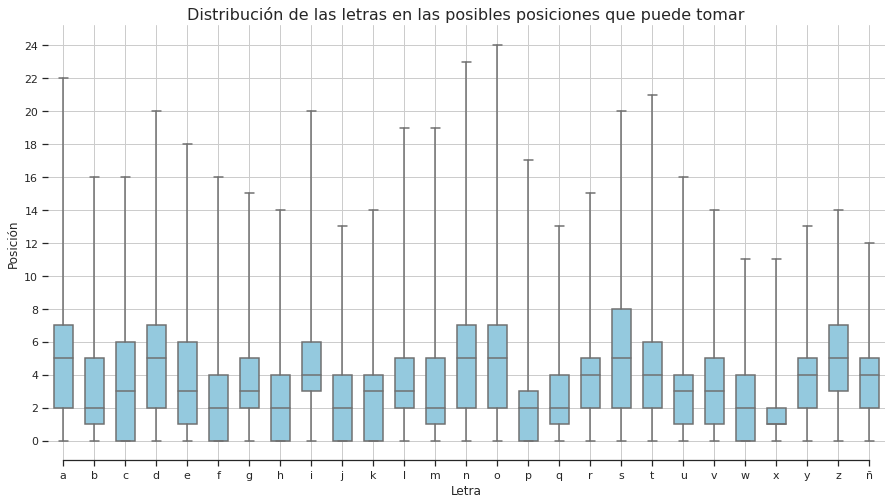

In [ ]:
#Graficar un boxplot
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Letra", y="Posicion", data=DF_letterPosition.sort_values('Letra'),
            whis=[0, 100], width=.6, color='skyblue')

# Add in points to show each observation
#sns.stripplot(x="Posicion", y="Letra", data=DF_letterPosition.sort_values('Letra'),size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(ylabel="Posición")
ax.set_title('Distribución de las letras en las posibles posiciones que puede tomar', fontsize=16)
ax.set_yticks(np.arange(0, 26, step=2))
sns.despine(trim=True, left=True)

In [ ]:
#Conocer la posicion de vocales y consonantes dentro de cada palabra
DicToDF_positionvowelsCons = {'Palabra':[],'Longitud': [], 'posicionVocal':[], 'posicionCons': []}
vowels = []
cons = []

for word in final_resume_file:
  DicToDF_positionvowelsCons['Palabra'].append(word)
  lengthWord = len(word)
  DicToDF_positionvowelsCons['Longitud'].append(lengthWord)

  for position,letter in enumerate(word): 
    if letter in 'aeiou':
      vowels.append(position)
    else:
      cons.append(position)
  DicToDF_positionvowelsCons['posicionVocal'].append(vowels)
  DicToDF_positionvowelsCons['posicionCons'].append(cons)
  vowels =[]
  cons = []

DF_positionvowelsCons = pd.DataFrame(DicToDF_positionvowelsCons)


def createGroupedDF(lenghtWord):
  newDF_dict = {'Palabra':[]}
  for newKey in range(lenghtWord):
    newDF_dict[f'posicion {str(newKey)}'] = []
  
  for index, longitud in enumerate(DicToDF_positionvowelsCons['Longitud']):
    if longitud == lenghtWord:
      word = DicToDF_positionvowelsCons['Palabra'][index]
      newDF_dict['Palabra'].append(word)

      for positionVowel in DicToDF_positionvowelsCons['posicionVocal'][index]:
        newDF_dict[f'posicion {str(positionVowel)}'].append(1)#1 para vocales
      for positionCons in DicToDF_positionvowelsCons['posicionCons'][index]:
        newDF_dict[f'posicion {str(positionCons)}'].append(0)#0 para Consonante
  
  return pd.DataFrame(newDF_dict)
  print(DF_positionvowelsCons)

In [ ]:
DF_positionvowelsCons['Longitud'].value_counts()

8     4873
7     4686
9     4535
10    3821
6     3687
5     2726
11    2668
12    1769
4     1284
13    1096
14     613
15     353
16     184
17      76
18      35
19      16
20       5
21       2
25       1
Name: Longitud, dtype: int64

In [ ]:
dfGrouped4 = createGroupedDF(4)
print(dfGrouped4.head())

  Palabra  posicion 0  posicion 1  posicion 2  posicion 3
0    area           1           0           1           1
1    agua           1           0           1           1
2    base           0           1           0           1
3    tipo           0           1           0           1
4    solo           0           1           0           1


In [ ]:
dfGrouped4 = createGroupedDF(4)
print(dfGrouped4.head())

def resumePatterns(DFGrouped):#Cuenta y retorna un DF con la cantidad de veces que se repite un patron. Por ejemplo, en una palabra de 4 letras el patron: 1010
  return DFGrouped[DFGrouped.columns[1:]].groupby(DFGrouped[DFGrouped.columns[1:]].columns.tolist(),as_index=False).size()

def getWords4(DFGrouped):#Retorna las palabras que concidan con el patron 0000
  #listPostions = [f'posicion {position}' for position in range(len(DFGrouped.columns) - 1)]
  return DFGrouped[np.logical_and(np.logical_and(DFGrouped['posicion 0']==0, DFGrouped['posicion 1']==1), np.logical_and(DFGrouped['posicion 2']==0, DFGrouped['posicion 3']==0))]

def getWords8(DFGrouped):#Retorna las palabras que concidan con el patron 00000000
  #listPostions = [f'posicion {position}' for position in range(len(DFGrouped.columns) - 1)]
  return DFGrouped[np.logical_and(np.logical_and(np.logical_and(DFGrouped['posicion 0']==0, DFGrouped['posicion 1']==0), np.logical_and(DFGrouped['posicion 2']==0, DFGrouped['posicion 3']==0)),
                   np.logical_and(np.logical_and(DFGrouped['posicion 4']==0, DFGrouped['posicion 5']==0), np.logical_and(DFGrouped['posicion 6']==0, DFGrouped['posicion 7']==0)))]


words = getWords4(dfGrouped4)
print(words)
resumePatterns4 = resumePatterns(dfGrouped4)
print(resumePatterns4)

  Palabra  posicion 0  posicion 1  posicion 2  posicion 3
0    area           1           0           1           1
1    agua           1           0           1           1
2    base           0           1           0           1
3    tipo           0           1           0           1
4    solo           0           1           0           1
     Palabra  posicion 0  posicion 1  posicion 2  posicion 3
33      hong           0           1           0           0
34      kong           0           1           0           0
40      cult           0           1           0           0
52      mung           0           1           0           0
76      tull           0           1           0           0
...      ...         ...         ...         ...         ...
1254    task           0           1           0           0
1259    hugh           0           1           0           0
1260    vols           0           1           0           0
1261    camp           0           1      

In [ ]:
resumePatterns4
resumePatterns4['probabilidad'] = resumePatterns4['size'] / resumePatterns4['size'].sum()

In [ ]:
resumePatterns4

,posicion 0,posicion 1,posicion 2,posicion 3,size,probabilidad
0,0,0,0,0,5,0.003894
1,0,0,0,1,2,0.001558
2,0,0,1,0,69,0.053738
3,0,0,1,1,29,0.022586
4,0,1,0,0,214,0.166667
5,0,1,0,1,584,0.454829
6,0,1,1,0,117,0.091121
7,0,1,1,1,10,0.007788
8,1,0,0,0,10,0.007788
9,1,0,0,1,83,0.064642


In [ ]:
dfGrouped8 = createGroupedDF(25)
print(dfGrouped8.head())

def resumePatterns(DFGrouped):#Cuenta y retorna un DF con la cantidad de veces que se repite un patron. Por ejemplo, en una palabra de 4 letras el patron: 1010
  return DFGrouped[DFGrouped.columns[1:]].groupby(DFGrouped[DFGrouped.columns[1:]].columns.tolist(),as_index=False).size()


resumePatterns8 = resumePatterns(dfGrouped8)
print(resumePatterns8)

                     Palabra  posicion 0  posicion 1  posicion 2  posicion 3  \
0  nicenoconstantinopolitano           0           1           0           1   

   posicion 4  posicion 5  posicion 6  posicion 7  posicion 8  ...  \
0           0           1           0           1           0  ...   

   posicion 15  posicion 16  posicion 17  posicion 18  posicion 19  \
0            0            1            0            1            0   

   posicion 20  posicion 21  posicion 22  posicion 23  posicion 24  
0            1            0            1            0            1  

[1 rows x 26 columns]
   posicion 0  posicion 1  posicion 2  posicion 3  posicion 4  posicion 5  \
0           0           1           0           1           0           1   

   posicion 6  posicion 7  posicion 8  posicion 9  ...  posicion 16  \
0           0           1           0           0  ...            1   

   posicion 17  posicion 18  posicion 19  posicion 20  posicion 21  \
0            0            1 

In [ ]:
groupedDF4 = createGroupedDF(4)


def resumeGroupedDF(groupedDF):
  dictToDF = {'Posicion':[], 'Vocales': [], 'Consonantes': []}
  for column in groupedDF.columns[1:]:
    infoPos = groupedDF4[column].value_counts()
    dictToDF['Posicion'].append(column)
    dictToDF['Vocales'].append(infoPos[1])
    dictToDF['Consonantes'].append(infoPos[0])

  return pd.DataFrame(dictToDF)

Lon4 = resumeGroupedDF(groupedDF4)

print(Lon4)

     Posicion  Vocales  Consonantes
0  posicion 0      254         1030
1  posicion 1      943          341
2  posicion 2      369          915
3  posicion 3      752          532


[Text(0.5, 0, 'Posición')]

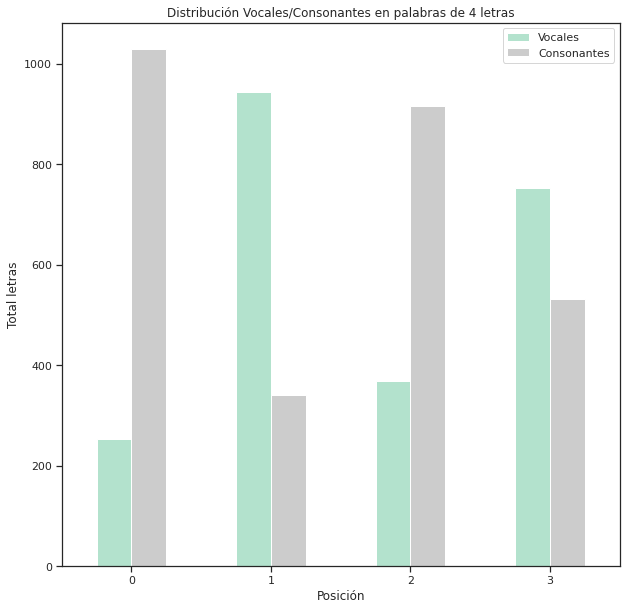

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
barplot = Lon4.plot.bar(rot=0, colormap='Pastel2', figsize=(10,10))
barplot.set_title('Distribución Vocales/Consonantes en palabras de 4 letras')
barplot.set(ylabel="Total letras")
barplot.set(xlabel="Posición")

In [ ]:
dictOFdicts4 = {}
dictToDF_letterPosition4 = {'Letra':[], 'Posicion':[]}
dictToDF_wordInfo4 = {'Consonante':[], 'Vocal':[], 'Longitud': []}

#Conocer el numero de vocales y consonantes de una palabra
for word4 in final_resume_file:
  if len(word4) == 4:
    numberVowels4 = len([l for l in word4 if l in 'aeiou'])
    numberCons4 = len(word4) - numberVowels4
    length4 = len(word4)
    dictToDF_wordInfo4['Consonante'].append(numberCons4)
    dictToDF_wordInfo4['Vocal'].append(numberVowels4)
    dictToDF_wordInfo4['Longitud'].append(length4)

    for position4,letter4 in enumerate(word4):    
      dictToDF_letterPosition4['Letra'].append(letter4)
      dictToDF_letterPosition4['Posicion'].append(position4)

DF_letterPosition4 = pd.DataFrame(dictToDF_letterPosition4)
dictToDF_wordInfo4 = pd.DataFrame(dictToDF_wordInfo4)

In [ ]:

tablafrecuencias4 = pd.crosstab(DF_letterPosition4['Letra'], DF_letterPosition4['Posicion'],margins=True)
tablafrecuencias4


Posicion,0,1,2,3,All
Letra,,,,,
a,115,272,107,284,778
b,78,11,37,10,136
c,96,9,58,7,170
d,57,21,69,30,177
e,39,167,99,140,445
f,49,7,10,11,77
g,46,12,39,25,122
h,48,26,13,26,113
i,32,169,70,48,319


In [ ]:
frecuenciasrelativas = [ ]

i=0
for indice,fila in tablafrecuencias4.iterrows():
  frecuenciasrelativas.append(fila/tablafrecuencias4['All'][indice])

In [ ]:
print(len(frecuenciasrelativas))

28


In [ ]:
pdfrecuenciasrelativas=pd.DataFrame(frecuenciasrelativas[:27])
pdfrecuenciasrelativas

Posicion,0,1,2,3,All
a,0.147815,0.349614,0.137532,0.365039,1.0
b,0.573529,0.080882,0.272059,0.073529,1.0
c,0.564706,0.052941,0.341176,0.041176,1.0
d,0.322034,0.118644,0.389831,0.169492,1.0
e,0.087640,0.375281,0.222472,0.314607,1.0
f,0.636364,0.090909,0.129870,0.142857,1.0
g,0.377049,0.098361,0.319672,0.204918,1.0
h,0.424779,0.230088,0.115044,0.230088,1.0
i,0.100313,0.529781,0.219436,0.150470,1.0
j,0.466667,0.100000,0.400000,0.033333,1.0


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]), <a list of 14 Text major ticklabel objects>)

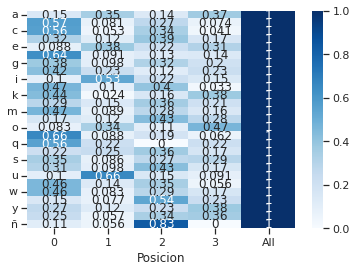

In [ ]:

pdfrecuenciasrelativas_NoAll = pdfrecuenciasrelativas[pdfrecuenciasrelativas.columns[:-1]]
sns.heatmap(pdfrecuenciasrelativas, annot=True,cmap='Blues')
plt.yticks(rotation=0) 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 <a list of 27 Text major ticklabel objects>)

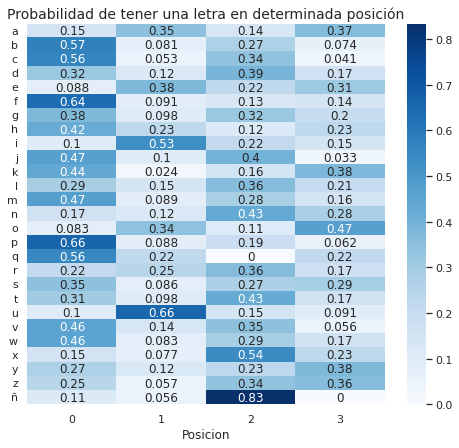

In [ ]:
sns.set(rc = {'figure.figsize':(8,7)})
fig_1=sns.heatmap(pdfrecuenciasrelativas_NoAll, annot=True,cmap='Blues')
fig_1.set_title('Probabilidad de tener una letra en determinada posición', fontsize=14)
plt.yticks(rotation=0) 

     Posicion  Vocales  Consonantes
0  posicion 0     1301         3572
1  posicion 1     3068         1805
2  posicion 2     1365         3508
3  posicion 3     2069         2804
4  posicion 4     2618         2255
5  posicion 5     1784         3089
6  posicion 6     2721         2152
7  posicion 7     2425         2448


[Text(0.5, 0, 'Posición')]

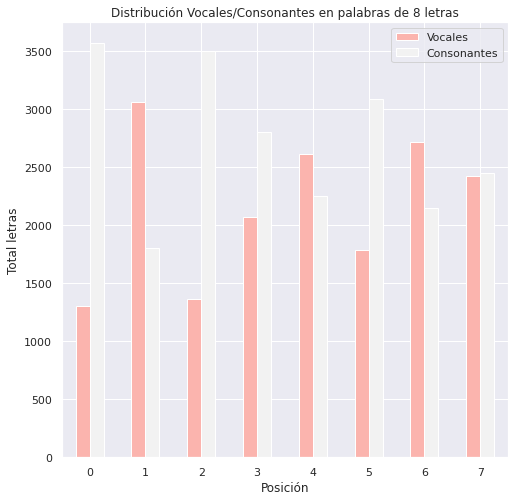

In [ ]:
# sns.set_style("whitegrid", {'axes.grid' : True})
groupedDF4 = createGroupedDF(8)


def resumeGroupedDF(groupedDF):
  dictToDF = {'Posicion':[], 'Vocales': [], 'Consonantes': []}
  for column in groupedDF.columns[1:]:
    infoPos = groupedDF4[column].value_counts()
    dictToDF['Posicion'].append(column)
    dictToDF['Vocales'].append(infoPos[1])
    dictToDF['Consonantes'].append(infoPos[0])

  return pd.DataFrame(dictToDF)

Lon8 = resumeGroupedDF(groupedDF4)

print(Lon8)
barplot = Lon8.plot.bar(rot=0,colormap='Pastel1', figsize=(8,8))
barplot.set_title('Distribución Vocales/Consonantes en palabras de 8 letras')
barplot.set(ylabel="Total letras")
barplot.set(xlabel="Posición")

Pruebas de hipótesis


In [ ]:
VocalesyConsonantes = {'Vocales': [], 'Consontantes':[ ], 'Longitud': [ ]}

categoricalLetras = {'Tipo':[ ], 'Posicion': [ ]}
LetrasporPosi = {'Letra':[ ], 'Posicion': [ ]}

for palabra in final_resume_file:
  tamano = len(palabra)
  VocalesyConsonantes['Longitud'].append(tamano)
  for posicion,letra in enumerate(palabra):
    LetrasporPosi['Letra'].append(letra)
    LetrasporPosi['Posicion'].append(posicion)
    if letra in 'aeiou':
      VocalesyConsonantes['Vocales'].append(posicion)
      categoricalLetras['Tipo'].append('vocal')
      categoricalLetras['Posicion'].append(posicion)
      

    else:
      VocalesyConsonantes['Consontantes'].append(posicion)
      categoricalLetras['Tipo'].append('consonante')
      categoricalLetras['Posicion'].append(posicion)


vocales = VocalesyConsonantes['Vocales']
consonantes = VocalesyConsonantes['Consontantes']
longi = VocalesyConsonantes['Longitud']


DFvocalescons = pd.DataFrame(list(zip(vocales,consonantes)), columns = ['Vocales','Consonantes'])


media_vocales = np.mean(vocales)
mediana_vocales = np.median(vocales)
moda_vocales = stats.mode(vocales)
desvEst_vocales = np.std(vocales)

print(f"las medidas de tendencia central para las vocales son:\nmedia: {media_vocales}, des. est: {desvEst_vocales}, mediana: {mediana_vocales}, moda: {moda_vocales[0]}")

media_consonantes = np.mean(consonantes)
mediana_consonantes = np.median(consonantes)
moda_consonantes = stats.mode(consonantes)
desvEst_cons = np.std(consonantes)

print(f"\nlas medidas de tendencia central para las consonantes son:\nmedia: {media_consonantes}, dev. est.: {desvEst_cons}, mediana: {mediana_consonantes}, moda: {moda_consonantes[0]}")

las medidas de tendencia central para las vocales son:
media: 4.388595375534031, des. est: 3.069261523271754, mediana: 4.0, moda: [1]

las medidas de tendencia central para las consonantes son:
media: 3.958983571218604, dev. est.: 3.0928320893813455, mediana: 3.0, moda: [2]


In [ ]:
DFvocalescons

,Vocales,Consonantes
0,0,2
1,1,4
2,3,7
3,5,8
4,6,2
...,...,...
122647,5,1
122648,7,2
122649,10,4
122650,3,6


In [ ]:
DFLetrasporPosi = pd.DataFrame(LetrasporPosi)
DFLetrasporPosi



,Letra,Posicion
0,a,0
1,e,1
2,r,2
3,o,3
4,p,4
...,...,...
275732,j,2
275733,e,3
275734,m,4
275735,b,5


In [ ]:
dfcategoricalLetras = pd.DataFrame(categoricalLetras)
dfcategoricalLetras

,Tipo,Posicion
0,vocal,0
1,vocal,1
2,consonante,2
3,vocal,3
4,consonante,4
...,...,...
275732,consonante,2
275733,vocal,3
275734,consonante,4
275735,consonante,5


In [ ]:
DFvocalescons

,Vocales,Consonantes
0,0,2
1,1,4
2,3,7
3,5,8
4,6,2
...,...,...
122647,5,1
122648,7,2
122649,10,4
122650,3,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Se tienen datos atípicos apartir de 12.0


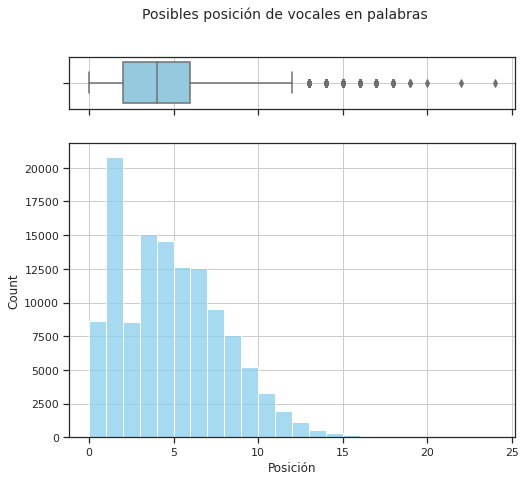

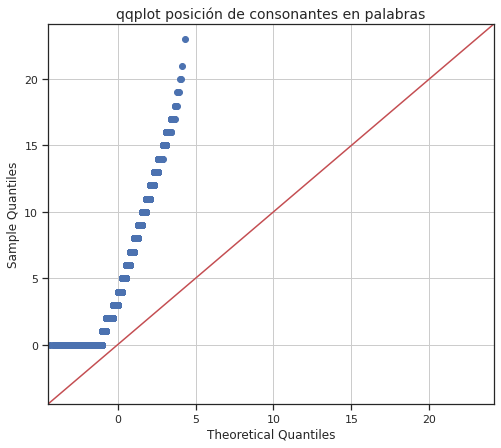

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
x = vocales
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
f.suptitle('Posibles posición de vocales en palabras', fontsize=14)

fig = sns.boxplot(x, ax=ax[0], color='skyblue')
fig.axes.axes.grid(True)
#fig.set_title('Letras en posición', fontsize=13)

sns.histplot(x,bins=(max(vocales)-min(vocales)), ax=ax[1], color='skyblue')
plt.grid(True)
plt.xlabel('Posición')
#plt.title('Posición de consonantes en palabras', fontsize=13)

c1_vocales = np.percentile(vocales,25)
c3_vocales = np.percentile(vocales,75)

RIC_vocales = c3_vocales -c1_vocales
atipicos_vocales = c3_vocales + 1.5*RIC_vocales


print(f'Se tienen datos atípicos apartir de {atipicos_vocales}')

fig = sm.qqplot (DFvocalescons['Consonantes'], line ='45')
fig.axes[0].set_title('qqplot posición de consonantes en palabras', fontsize=14)
plt.grid(True)
plt.show ()

In [ ]:
#Eliminando datos atípicos 
VocalesyConsonantes_SinAtipicos = {'Vocales': [], 'Consontantes':[ ]}

palabra=0
posicion=0
letra=0
for palabra in final_resume_file:
  tamano = len(palabra)
  VocalesyConsonantes['Longitud'].append(tamano)
  for posicion,letra in enumerate(palabra):
    if posicion<13:
      if letra in 'aeiou':
        VocalesyConsonantes_SinAtipicos['Vocales'].append(posicion)      
      else:
        VocalesyConsonantes_SinAtipicos['Consontantes'].append(posicion)

vocales_SinAtipicos = VocalesyConsonantes_SinAtipicos['Vocales']
consonantes_SinAtipicos = VocalesyConsonantes_SinAtipicos['Consontantes']

pdVocales_SinAtipicos=pd.DataFrame(vocales_SinAtipicos)

In [ ]:
pdVocales_SinAtipicos

,0
0,0
1,1
2,3
3,5
4,6
...,...
121531,5
121532,7
121533,10
121534,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Posición de consonantes en palabras')

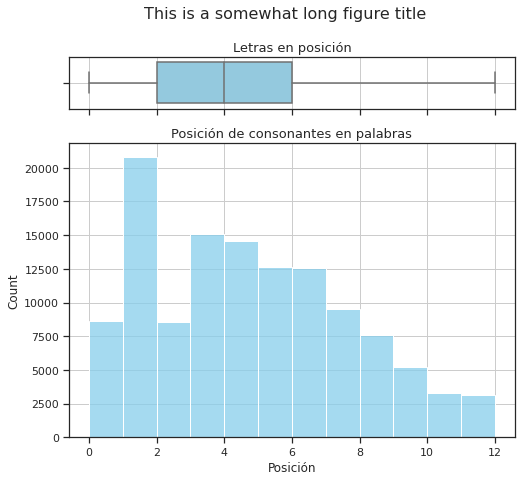

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
xv = vocales_SinAtipicos
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
f.suptitle('This is a somewhat long figure title', fontsize=16)

fig1 = sns.boxplot(xv, ax=ax[0], color='skyblue')
fig1.axes.axes.grid(True)
fig1.set_title('Letras en posición', fontsize=13)

sns.histplot(xv,bins=(max(vocales_SinAtipicos)-min(vocales_SinAtipicos)), ax=ax[1], color='skyblue')
plt.grid(True)
plt.xlabel('Posición')
plt.title('Posición de consonantes en palabras', fontsize=13)

Conocer la distribución de los datos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


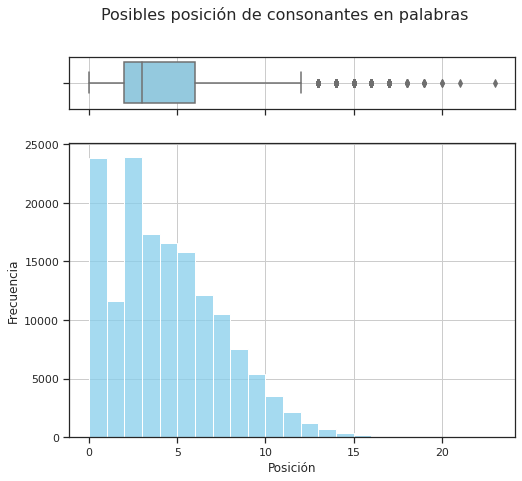

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
xc = consonantes
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
f.suptitle('Posibles posición de consonantes en palabras', fontsize=16)

fig2 = sns.boxplot(xc, ax=ax[0], color='skyblue')
fig2.axes.axes.grid(True)
#fig2.set_title('Letras en posición', fontsize=13)

sns.histplot(xc,bins=(max(consonantes)-min(consonantes)), ax=ax[1], color='skyblue')
plt.grid(True)
#plt.title('Posición de consonantes en palabras')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')

plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


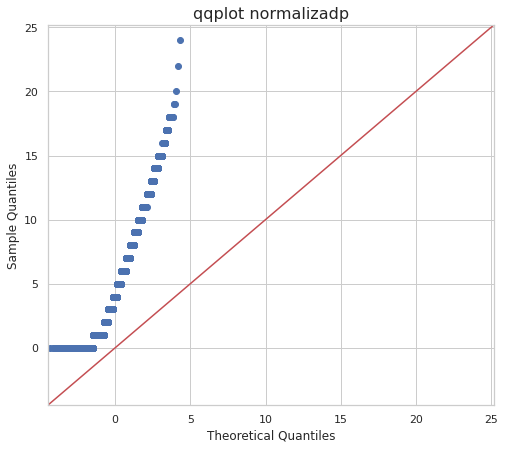

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'axes.grid' : True})


#create la gráfica QQ con una línea de 45 grados agregada a la gráfica
fig = sm.qqplot (DFvocalescons.Vocales, line ='45')
fig.axes[0].set_title('qqplot normalizadp', fontsize=16)
plt.show ()

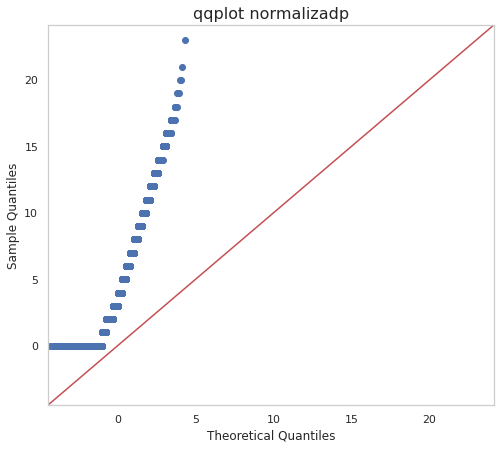

In [ ]:
#create la gráfica QQ con una línea de 45 grados agregada a la gráfica

sns.set_style("whitegrid", {'axes.grid' : False})
fig = sm.qqplot (DFvocalescons.Consonantes, line ='45')
fig.axes[0].set_title('qqplot normalizadp', fontsize=16)

plt.show ()

In [ ]:
#Prueba de hipotesis
from scipy import stats

stats.ks_2samp(DFvocalescons.Vocales,DFvocalescons.Consonantes)

Ks_2sampResult(statistic=0.08448292730652579, pvalue=0.0)

In [ ]:
tablafrecuencias = pd.crosstab(DFvocalescons['Vocales'], DFvocalescons['Consonantes'])
tablafrecuencias

Consonantes,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,23
Vocales,,,,,,,,,,,,,,,,,,,,,
0,1332,614,1372,964,898,889,652,613,444,311,...,44,27,14,8,0,0,0,0,0,0
1,3234,1578,3207,2386,2181,2161,1693,1394,1067,734,...,99,56,23,9,7,0,0,0,1,0
2,1310,672,1339,973,911,857,665,604,414,311,...,39,16,6,5,3,2,0,0,0,0
3,2363,1194,2379,1693,1678,1488,1175,988,756,503,...,66,36,13,6,2,0,1,0,0,1
4,2269,1129,2260,1616,1554,1528,1156,995,720,531,...,75,45,13,12,3,1,0,1,0,0
5,1911,976,2008,1472,1391,1287,1009,833,626,462,...,71,24,16,5,2,1,2,1,0,0
6,1944,939,1949,1400,1361,1310,1017,891,609,431,...,79,31,13,5,2,1,1,0,0,0
7,1430,738,1506,1098,1044,1040,716,636,466,378,...,39,14,13,6,2,0,0,0,0,0
8,1205,583,1184,842,869,766,615,533,329,255,...,35,20,9,6,2,1,0,0,0,0


In [ ]:
DF_positionvowelsCons

,Palabra,Longitud,posicionVocal,posicionCons
0,aeropuerto,10,"[0, 1, 3, 5, 6, 9]","[2, 4, 7, 8]"
1,aerodromo,9,"[0, 1, 3, 6, 8]","[2, 4, 5, 7]"
2,terminal,8,"[1, 4, 6]","[0, 2, 3, 5, 7]"
3,viaje,5,"[1, 2, 4]","[0, 3]"
4,transporte,10,"[2, 6, 9]","[0, 1, 3, 4, 5, 7, 8]"
...,...,...,...,...
32425,libreville,10,"[1, 4, 6, 9]","[0, 2, 3, 5, 7, 8]"
32426,rosira,6,"[1, 3, 5]","[0, 2, 4]"
32427,recitado,8,"[1, 3, 5, 7]","[0, 2, 4, 6]"
32428,complementen,12,"[1, 5, 7, 10]","[0, 2, 3, 4, 6, 8, 9, 11]"


In [ ]:
dfcategoricalLetras

,Tipo,Posicion
0,vocal,0
1,vocal,1
2,consonante,2
3,vocal,3
4,consonante,4
...,...,...
275732,consonante,2
275733,vocal,3
275734,consonante,4
275735,consonante,5


In [ ]:

tablafrecuencias = pd.crosstab(dfcategoricalLetras['Tipo'], dfcategoricalLetras['Posicion'])
tablafrecuencias

Posicion,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tipo,,,,,,,,,,,,,,,,,,,,,
consonante,23817,11651,23883,17373,16582,15797,12140,10508,7550,5416,...,157,84,33,7,5,2,1,0,1,0
vocal,8613,20779,8547,15057,14564,12623,12593,9539,7624,5223,...,162,51,26,17,3,1,0,1,0,1


In [ ]:
tablafrecuenciasSinatipicos = tablafrecuencias[tablafrecuencias.columns[:15]]
tablafrecuenciasSinatipicos

Posicion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Tipo,,,,,,,,,,,,,,,
consonante,23817,11651,23883,17373,16582,15797,12140,10508,7550,5416,3554,2185,1236,742,361
vocal,8613,20779,8547,15057,14564,12623,12593,9539,7624,5223,3264,1965,1145,543,311


In [ ]:
#Prueba de hipotesis 1: 
#Ho = No hay relación entre la posición de las vocales y las consonantes en las palabra
#Ha = Sí hay relación entre la posición de las vocales y las consonantes en las palabras
alpha = 0.005
che2, p, dof, freq = stats.chi2_contingency(tablafrecuencias)
if p >= alpha:
  print(f'la p= {p} por lo tando La Ho se acepta')
else:
  print(f'la p= {p} por lo tando La Ho se rechaza')

la p= 0.0 por lo tando La Ho se rechaza


In [ ]:
#Prueba de hipotesis 1 sin atípicos: 
#Ho = No hay relación entre la posición de las vocales y las consonantes en las palabra
#Ha = Sí hay relación entre la posición de las vocales y las consonantes en las palabras
alpha = 0.005
che2, p, dof, freq = stats.chi2_contingency(tablafrecuenciasSinatipicos)
if p >= alpha:
  print(f'la p= {p} por lo tando La Ho se acepta')
else:
  print(f'la p= {p} por lo tando La Ho se rechaza')

la p= 0.0 por lo tando La Ho se rechaza


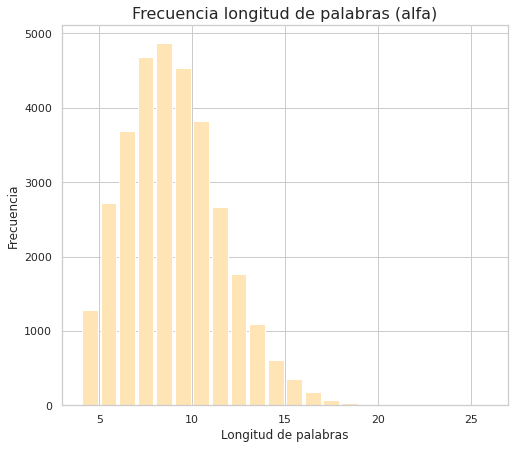

<Figure size 576x504 with 0 Axes>

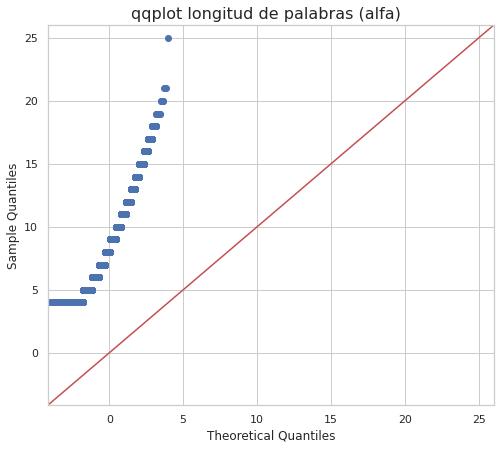

In [ ]:
#Prueba de hipótesis 2:
#conociendo la distribución de los datos
plt.figure()
plt.hist(longitud_palabras, bins=intervalos, color='moccasin', rwidth=0.85)
plt.title('Frecuencia longitud de palabras (alfa)', fontsize=16)
plt.xlabel('Longitud de palabras')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.figure()
fig = sm.qqplot (DFLongitudPalabras.Longitud, line ='45')
fig.axes[0].set_title('qqplot longitud de palabras (alfa)  ', fontsize=14)
plt.show ()

In [ ]:
#Crear la tabla de frecuencia para la prueba de hipótesis
with open('/content/Data/final_eliminandoacentos.txt', 'r', encoding="utf8" ) as file_sinacentos:
         archivo_sinacentos = file_sinacentos.read()

txt_sinacentos = archivo_sinacentos.split(' ')
print(len(txt_sinacentos))

categoricaBD={'Origen BD':[],'Longitud':[ ]}
i=0
for i in txt_sinacentos:
  longi = len(i)
  categoricaBD['Origen BD'].append('DB sin acento')
  categoricaBD['Longitud'].append(longi)

for j in longitud_palabras:

  categoricaBD['Origen BD'].append('DB original')
  categoricaBD['Longitud'].append(j)

pdcategoricaBD=pd.DataFrame(categoricaBD)
pdcategoricaBD

32349


,Origen BD,Longitud
0,DB sin acento,10
1,DB sin acento,9
2,DB sin acento,8
3,DB sin acento,5
4,DB sin acento,10
...,...,...
64774,DB original,10
64775,DB original,6
64776,DB original,8
64777,DB original,12


In [ ]:
#Se crea la tabla de frencuencias
frecuencias_pdcategoricaBD=pd.crosstab(pdcategoricaBD['Origen BD'],pdcategoricaBD['Longitud'])
frecuencias_pdcategoricaBD

Longitud,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25
Origen BD,,,,,,,,,,,,,,,,,,,
DB original,1284,2726,3687,4686,4873,4535,3821,2668,1769,1096,613,353,184,76,35,16,5,2,1
DB sin acento,1257,2704,3677,4681,4864,4531,3821,2666,1769,1095,613,352,184,76,35,16,5,2,1


In [ ]:
#Se crea nuevamente una tabla de frecuencia que si cumpla con la condicion de minimo 5
TFcategoricaBD = frecuencias_pdcategoricaBD[frecuencias_pdcategoricaBD.columns[:17]]
TFcategoricaBD

Longitud,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Origen BD,,,,,,,,,,,,,,,,,
DB original,1284,2726,3687,4686,4873,4535,3821,2668,1769,1096,613,353,184,76,35,16,5
DB sin acento,1257,2704,3677,4681,4864,4531,3821,2666,1769,1095,613,352,184,76,35,16,5


In [ ]:
#Ho = No hay cambios estadisticamente significativos al eliminar las palabras alfa en la distribución de los datos
#Ha = Sí hay cambios estadisticamente significativos al eliminar las palabras alfa en la distribución de los datos
alpha = 0.005
che2, p, dof, freq = stats.chi2_contingency(TFcategoricaBD)
if p >= alpha:
  print(f'la p= {p} por lo tando La Ho se acepta')
else:
  print(f'la p= {p} por lo tando La Ho se rechaza')

la p= 0.9999999999938741 por lo tando La Ho se acepta


In [ ]:
#Prueba de hipótesis 3 :se reemplazan todas las letras que tienen acentos por sus homólogos
#Crear la tabla de frecuencia para la prueba de hipótesis
with open('/content/Data/final_reemplazandoacentos.txt', 'r', encoding="utf8" ) as file_conacentos:
         archivo_conacentos = file_conacentos.read()

txt_conacentos = archivo_conacentos.split(' ')
print(len(txt_conacentos))

categoricaBD_acentos={'Origen BD':[],'Longitud':[ ]}
i=0
longi=0
for i in txt_conacentos:
  longi = len(i)
  categoricaBD_acentos['Origen BD'].append('DB reemplazo acentos')
  categoricaBD_acentos['Longitud'].append(longi)

j=0
for j in longitud_palabras:

  categoricaBD_acentos['Origen BD'].append('DB original')
  categoricaBD_acentos['Longitud'].append(j)

pdcategoricaBD_conacentos=pd.DataFrame(categoricaBD_acentos)
pdcategoricaBD_conacentos


32446


,Origen BD,Longitud
0,DB reemplazo acentos,10
1,DB reemplazo acentos,9
2,DB reemplazo acentos,8
3,DB reemplazo acentos,5
4,DB reemplazo acentos,10
...,...,...
64871,DB original,10
64872,DB original,6
64873,DB original,8
64874,DB original,12


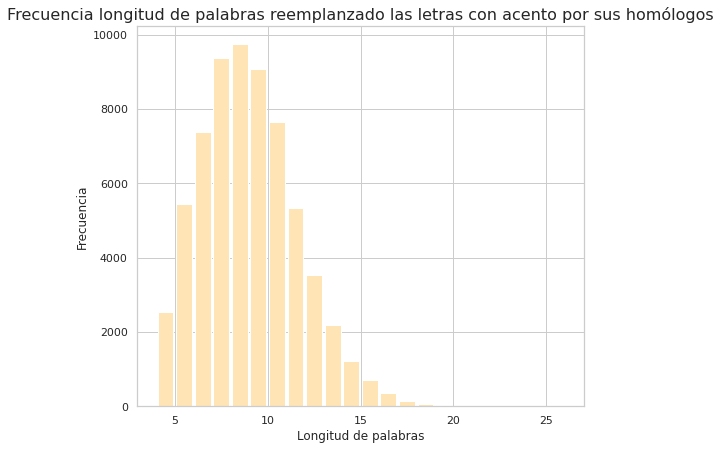

<Figure size 576x504 with 0 Axes>

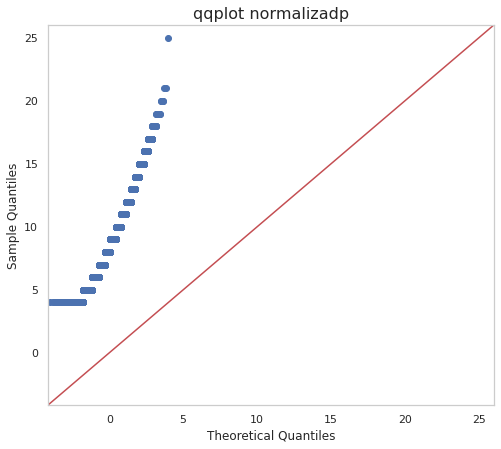

In [ ]:
#conociendo la distribución de los datos
plt.figure()
plt.hist(categoricaBD_acentos['Longitud'], bins=intervalos, color='moccasin', rwidth=0.85)
plt.title('Frecuencia longitud de palabras reemplanzado las letras con acento por sus homólogos', fontsize=16)
plt.xlabel('Longitud de palabras')
plt.ylabel('Frecuencia')
plt.grid()

plt.figure()
fig = sm.qqplot (DFLongitudPalabras.Longitud, line ='45')
fig.axes[0].set_title('qqplot normalizadp', fontsize=16)
plt.show ()

In [ ]:
#Se crea la tabla de contigencia
tabla_pdcategoricaBD_conacentos = pd.crosstab(pdcategoricaBD_conacentos['Origen BD'],pdcategoricaBD_conacentos['Longitud'])
tabla_pdcategoricaBD_conacentos

Longitud,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25
Origen BD,,,,,,,,,,,,,,,,,,,
DB original,1284,2726,3687,4686,4873,4535,3821,2668,1769,1096,613,353,184,76,35,16,5,2,1
DB reemplazo acentos,1261,2713,3696,4694,4879,4540,3830,2672,1775,1097,614,354,185,76,35,17,5,2,1


In [ ]:
#Para poder aplicar chi cuadrado se debe cumplir con minimo 5
TFcategoricaBD_acentos = tabla_pdcategoricaBD_conacentos[tabla_pdcategoricaBD_conacentos.columns[:17]]
TFcategoricaBD_acentos

Longitud,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Origen BD,,,,,,,,,,,,,,,,,
DB original,1284,2726,3687,4686,4873,4535,3821,2668,1769,1096,613,353,184,76,35,16,5
DB reemplazo acentos,1261,2713,3696,4694,4879,4540,3830,2672,1775,1097,614,354,185,76,35,17,5


In [ ]:
#Ho = No hay cambios estadisticamente significativos al reemplazar las palabras con acentos por sus homólogas en la distribución de los datos
#Ha = Sí hay cambios estadisticamente significativos al eliminar las palabras con acentos por sus homólogas en la distribución de los datos
alpha = 0.005
che2, p, dof, freq = stats.chi2_contingency(TFcategoricaBD_acentos)
if p >= alpha:
  print(f'la p= {p} por lo tando La Ho se acepta')
else:
  print(f'la p= {p} por lo tando La Ho se rechaza')

la p= 0.9999999999910576 por lo tando La Ho se acepta


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


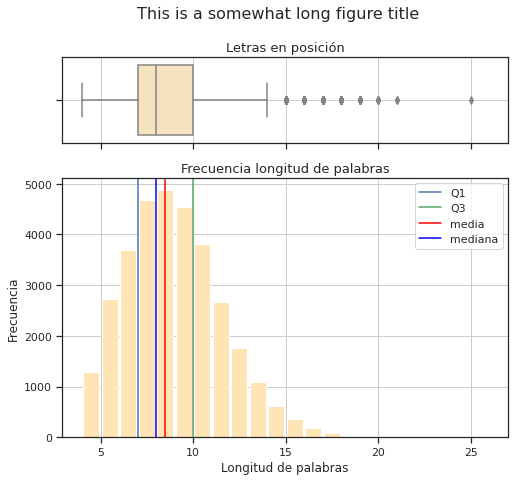

In [ ]:
sns.set_theme(style="ticks")
x = longitud_palabras
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.30, .90)})

f.suptitle('This is a somewhat long figure title', fontsize=16)

fig_1=sns.boxplot(x, ax=ax[0], color='moccasin')
fig_1.axes.axes.grid(True)
fig_1.set_title('Letras en posición', fontsize=13)

plt.hist(longitud_palabras, bins=intervalos, color='moccasin', rwidth=0.85)
plt.axvline(c1,label = 'Q1', color='b')
plt.axvline(c3,label = 'Q3', color='g')
plt.axvline(np.mean(x),label = 'media', color='red')
plt.axvline(np.median(x),label = 'mediana', color='blue')
plt.title('Frecuencia longitud de palabras', fontsize=13)
plt.xlabel('Longitud de palabras')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid()




In [ ]:
#Para poder aplicar la prueba de hipótesis binomial no parametrica se aplica el teorema del limite central

Prueba de correlación

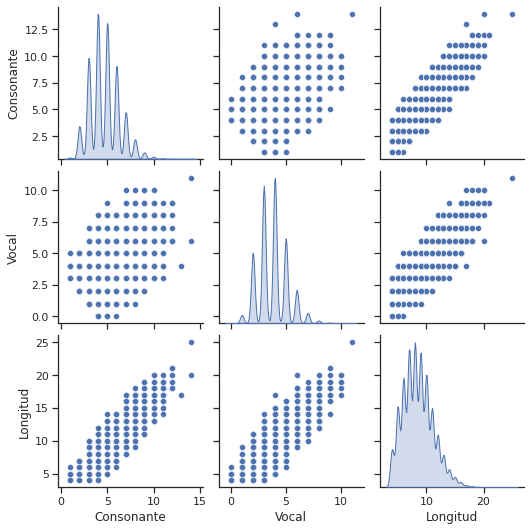

In [ ]:
DF_wordInfo
sns.pairplot(DF_wordInfo,diag_kind='kde')


Text(0.5, 1.0, 'Letras en posición')

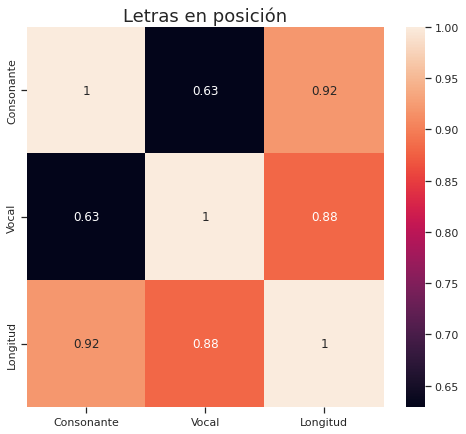

In [ ]:
fig_1 = sns.heatmap(DF_wordInfo.corr(method='pearson'),annot=True)
fig_1.set_title('Corre', fontsize=18)

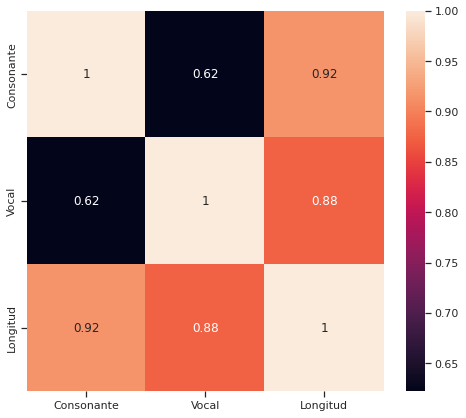

In [ ]:
sns. heatmap(DF_wordInfo.corr(method='spearman'),annot=True)

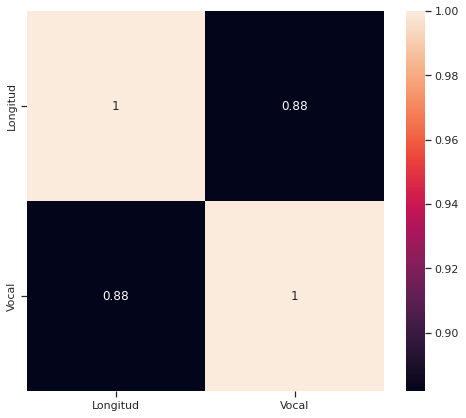

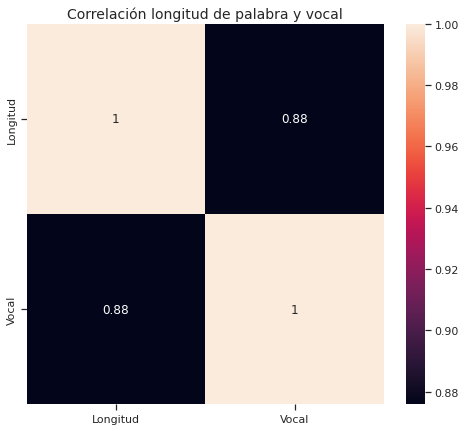

In [ ]:
corLetrasVocales = DF_wordInfo[['Longitud','Vocal']]

sns. heatmap(corLetrasVocales.corr(method='pearson'),annot=True)
plt.show()

fig_1=sns. heatmap(corLetrasVocales.corr(method='spearman'),annot=True)
fig_1.set_title('Correlación longitud de palabra y vocal', fontsize=14)
plt.show()

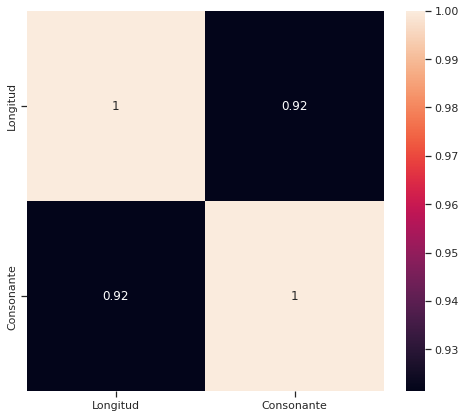

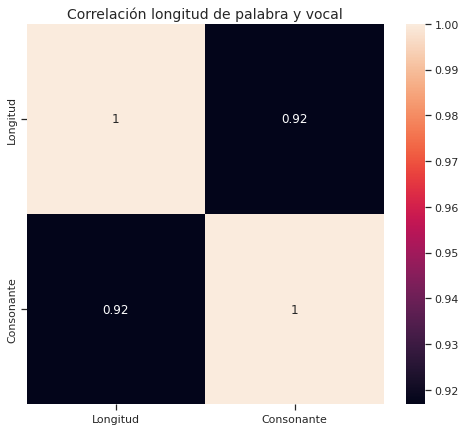

In [ ]:
corLetrasCon = DF_wordInfo[['Longitud','Consonante']]
sns.heatmap(corLetrasCon.corr(method='pearson'),annot=True)
plt.show()

fig_1=sns. heatmap(corLetrasCon.corr(method='spearman'),annot=True)
fig_1.set_title('Correlación longitud de palabra y vocal', fontsize=14)
plt.show()

In [ ]:
pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator
translator = Translator()
translator.translate('hello world')

In [ ]:
with open('/content/Data/NoEspanol.txt', 'r',encoding="utf8") as No_Esp:
    Otros_idionmas = No_Esp.read()
Otros_idionmas_file = Otros_idionmas.split(' ')

with open('/content/Data/espanol.txt', 'r',encoding="utf8") as Esp:
    Espanol = Esp.read()
Espanol_file = Espanol.split(' ')

In [ ]:
print(len(Otros_idionmas_file))
print(len(Espanol_file))

410
5586


In [ ]:
VocalesyConsonantes_Otroidioma = {'Vocales': [], 'Consontantes':[ ], 'Longitud': [ ]}

palabra = 0
posicion= 0

for palabra in Otros_idionmas_file:
  tamano = len(palabra)
  #VocalesyConsonantes_Otroidioma['Longitud'].append(tamano)
  for posicion,letra in enumerate(palabra):
    if letra in 'aeiou':
      VocalesyConsonantes_Otroidioma['Vocales'].append(posicion)
    else:
      VocalesyConsonantes_Otroidioma['Consontantes'].append(posicion)


vocales_Otroidioma = VocalesyConsonantes['Vocales']
consonantes_Otroidioma = VocalesyConsonantes['Consontantes']
#longi_Otroidioma = VocalesyConsonantes['Longitud']

pdvocales_Otroidioma=pd.DataFrame(VocalesyConsonantes['Vocales'])
pdconsonantes_Otroidioma = pd.DataFrame(VocalesyConsonantes['Consontantes'])

In [ ]:
print(len(vocales_Otroidioma))
print(len(consonantes_Otroidioma))
pdvocales_Otroidioma

122652
153085


,0
0,0
1,1
2,3
3,5
4,6
...,...
122647,5
122648,7
122649,10
122650,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


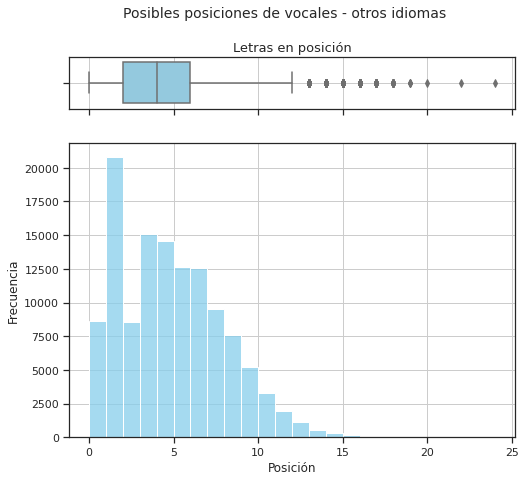

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


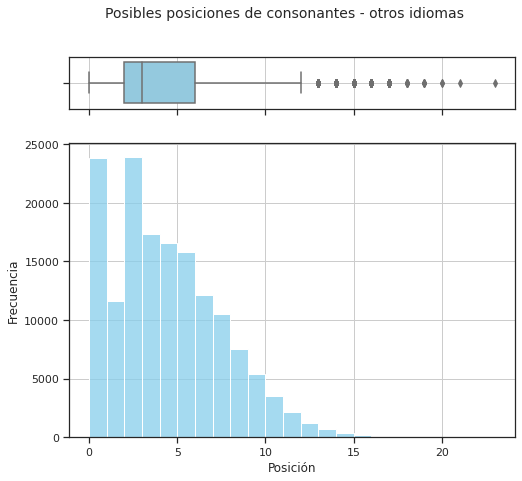

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
xv_o = vocales_Otroidioma
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
f.suptitle('Posibles posiciones de vocales - otros idiomas', fontsize=14)

fig3 = sns.boxplot(xv_o, ax=ax[0], color='skyblue')
fig3.axes.axes.grid(True)
fig3.set_title('Letras en posición', fontsize=13)

sns.histplot(xv_o,bins=(max(vocales_Otroidioma)-min(vocales_Otroidioma)), ax=ax[1], color='skyblue')
plt.grid(True)
#plt.title('Posición de consonantes en palabras')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()


xc_o = consonantes_Otroidioma
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
f.suptitle('Posibles posiciones de consonantes - otros idiomas', fontsize=14)
fig4 = sns.boxplot(xc_o, ax=ax[0], color='skyblue')
fig4.axes.axes.grid(True)
#fig4.set_title('Letras en posición', fontsize=13)

sns.histplot(xc_o,bins=(max(consonantes_Otroidioma)-min(consonantes_Otroidioma)), ax=ax[1], color='skyblue')
plt.grid(True)
#plt.title('Posición de consonantes en palabras')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.show()

#####

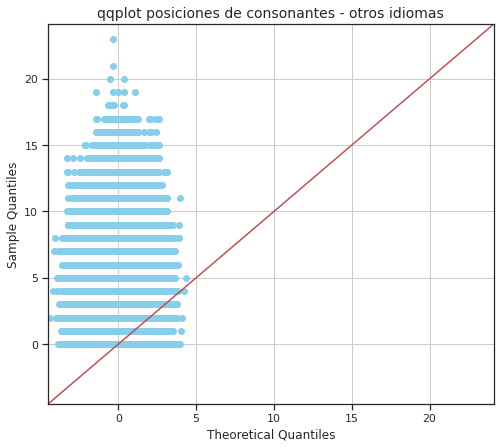

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
fig = sm.qqplot (pdconsonantes_Otroidioma, line ='45', color='skyblue')
fig.axes[0].set_title('qqplot posiciones de consonantes - otros idiomas', fontsize=14)
plt.grid(True)
plt.show ()

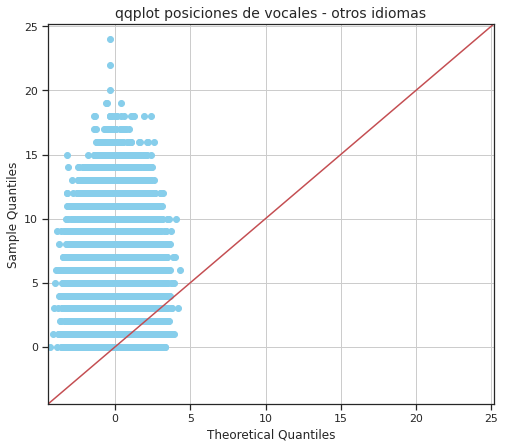

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_theme(style="ticks")
fig = sm.qqplot (pdvocales_Otroidioma, line ='45', color='skyblue')
fig.axes[0].set_title('qqplot posiciones de vocales - otros idiomas', fontsize=14)
plt.grid(True)
plt.show ()

In [ ]:
#Se construye tabla de frecuencias para la hipótesis 2
categoricalLetras_O = {'Tipo':[ ], 'Posicion': [ ]}


for palabra in Otros_idionmas_file:
  tamano = len(palabra)

  for posicion,letra in enumerate(palabra):

    if letra in 'aeiou':

      categoricalLetras_O['Tipo'].append('vocal')
      categoricalLetras_O['Posicion'].append(posicion)
      

    else:

      categoricalLetras_O['Tipo'].append('consonante')
      categoricalLetras_O['Posicion'].append(posicion)


pdcategoricalLetras_O = pd.DataFrame(categoricalLetras_O)



In [ ]:
tablafrecuencias_O = pd.crosstab(pdcategoricalLetras_O['Tipo'], pdcategoricalLetras_O['Posicion'])
tablafrecuencias_O

Posicion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Tipo,,,,,,,,,,,,,,,,,,,,
consonante,339,127,276,282,202,170,111,82,47,27,16,6,3,2,2,0,1,1,0,1
vocal,70,282,133,127,156,110,84,56,38,22,9,7,4,1,0,1,0,0,1,0


In [ ]:
tablafrecuencias_O1 = tablafrecuencias_O[tablafrecuencias_O.columns[:12]]
tablafrecuencias_O1

Posicion,0,1,2,3,4,5,6,7,8,9,10,11
Tipo,,,,,,,,,,,,
consonante,339,127,276,282,202,170,111,82,47,27,16,6
vocal,70,282,133,127,156,110,84,56,38,22,9,7


In [ ]:
#La relación entre las vocales y las consonantes es independiente del idioma?
alpha = 0.005
che2, p, dof, freq = stats.chi2_contingency(tablafrecuencias_O1)
if p >= alpha:
  print(f'la p= {p} por lo tando La Ho se acepta')
else:
  print(f'la p= {p} por lo tando La Ho se rechaza')

la p= 1.1166028780702177e-49 por lo tando La Ho se rechaza


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


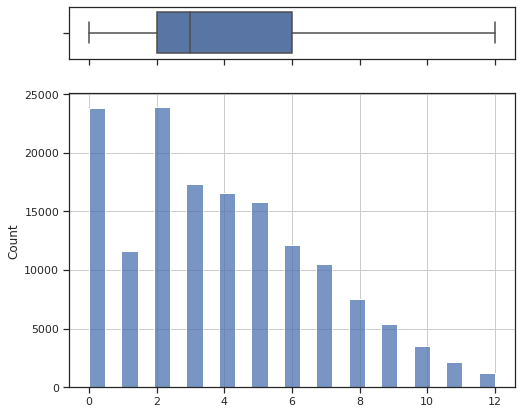

In [ ]:
xvoc = consonantes_SinAtipicos
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(xvoc, ax=ax[0])
sns.histplot(xvoc,bins=(max(consonantes_Otroidioma)-min(consonantes_Otroidioma)+2), ax=ax[1])
plt.grid(True)